In [ ]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("keras", keras.__version__)

TensorFlow version: 2.19.0
keras 3.10.0


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full/255.0
X_test = X_test/255.0

X_valid, X_train = X_train_full[:6000], X_train_full[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Test:", X_test.shape, y_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (54000, 28, 28)
y_train shape: (54000,)
Test: (10000, 28, 28) (10000,)


In [ ]:
#mlp model
mlp_model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

mlp_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


mlp_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_mlp = mlp_model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7828 - loss: 0.6149 - val_accuracy: 0.8640 - val_loss: 0.3804
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8643 - loss: 0.3736 - val_accuracy: 0.8762 - val_loss: 0.3389
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8778 - loss: 0.3314 - val_accuracy: 0.8745 - val_loss: 0.3491
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8857 - loss: 0.3053 - val_accuracy: 0.8807 - val_loss: 0.3356
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8943 - loss: 0.2829 - val_accuracy: 0.8803 - val_loss: 0.3249
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8989 - loss: 0.2664 - val_accuracy: 0.8913 - val_loss: 0.3065
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9053 - loss: 0.2559 - val_accuracy: 0.8867 - val_loss: 0.3122
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9054 - loss: 0

In [ ]:
X_train_cnn = X_train[..., np.newaxis]
X_valid_cnn = X_valid[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

cnn_model =  keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn = cnn_model.fit(
    X_train_cnn, y_train,
    epochs = 12,
    validation_data=(X_valid_cnn, y_valid)
)


test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Test accuracy (CNN): {test_accuracy_cnn:4f}")

Epoch 1/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.7431 - loss: 0.7150 - val_accuracy: 0.8882 - val_loss: 0.3213
Epoch 2/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.8712 - loss: 0.3601 - val_accuracy: 0.8985 - val_loss: 0.2712
Epoch 3/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.8897 - loss: 0.2995 - val_accuracy: 0.9142 - val_loss: 0.2476
Epoch 4/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9044 - loss: 0.2681 - val_accuracy: 0.9158 - val_loss: 0.2251
Epoch 5/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9130 - loss: 0.2422 - val_accuracy: 0.9187 - val_loss: 0.2196
Epoch 6/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.9206 - loss: 0.2186 - val_accuracy: 0.9227 - val_loss: 0.2078
Epoch 7/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.9277 - loss: 0.2031 - val_accuracy: 0.9202 - val_loss: 0.2069
Epoch 8/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.9289 -

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

def build_mlp(activation='relu', optimizer='adam', dropout_rate=0.0, l2_reg=0.0):
  model = keras.Sequential([
      layers.Flatten(input_shape=[28, 28]),
      layers.Dense(300, activation=activation,
                   kernel_regularizer = regularizers.l2(l2_reg) if l2_reg > 0.0 else None
                   ),
      layers.Dropout(dropout_rate),
      layers.Dense(100, activation=activation,
                   kernel_regularizer = regularizers.l2(l2_reg) if l2_reg > 0.0 else None
                   ),
      layers.Dropout(dropout_rate),
      layers.Dense(10, activation='softmax')
  ])

  model.compile(
      loss='sparse_categorical_crossentropy',
      optimizer=optimizer,
      metrics=['accuracy']
    )

  return model


In [ ]:
from re import VERBOSE
activations =  ['relu', 'tanh', 'sigmoid']
results_activations = {}

for act in activations:
  print(f"n----Training with activation = {act}---")
  model = build_mlp(activation=act)
  history = model.fit(
      X_train, y_train,
      epochs=5, batch_size=128,
      validation_data=(X_valid, y_valid),
      verbose=0
  )

  val_acc =  history.history['val_accuracy'][-1]
  results_activations[act] = val_acc
  print(f"Validation accuracy with {act} activation: {val_acc:.4f}")

print(results_activations)


n----Training with activation = relu---
Validation accuracy with relu activation: 0.8753
n----Training with activation = tanh---
Validation accuracy with tanh activation: 0.8817
n----Training with activation = sigmoid---
Validation accuracy with sigmoid activation: 0.8768
{'relu': 0.875333309173584, 'tanh': 0.8816666603088379, 'sigmoid': 0.8768333196640015}


In [ ]:
optimizers = {
    'adam' : Adam(learning_rate=0.001),
    'sgd' : SGD(learning_rate=0.01, momentum=0.9),
    'rmsprop' : RMSprop(learning_rate=0.001)
}

results_opt = {}

for name, opt in optimizers.items():
  print(f"Training with optimizer: {name}")
  model = build_mlp(activation='relu', optimizer=opt)
  history = model.fit(X_train, y_train,
                     epochs=5, batch_size=128,
                      validation_data=(X_valid, y_valid),
                      verbose=0
                      )
  val_acc = history.history['val_accuracy'][-1]
  results_opt[name] = val_acc

print(results_opt)

Training with optimizer: adam
Training with optimizer: sgd
Training with optimizer: rmsprop
{'adam': 0.8806666731834412, 'sgd': 0.8771666884422302, 'rmsprop': 0.8684999942779541}


In [ ]:
regularization_settings = [
    {'dropout_rate' : 0.0, 'l2_reg': 0.0},
    {'dropout_rate' : 0.3, 'l2_reg': 0.0},
    {'dropout_rate' : 0.5, 'l2_reg': 0.001},
]

results_reg = {}

for settings in regularization_settings:
  dr, l2r = settings['dropout_rate'], settings['l2_reg']
  print(f"\n---Training with dropout_rate = {dr} and l2_reg = {l2r}---")
  model = build_mlp(dropout_rate=dr, l2_reg=l2r)
  history = model.fit(X_train, y_train,
                      epochs=5, batch_size=128,
                      validation_data=(X_valid, y_valid),
                      verbose=0
                      )
  val_acc = history.history['val_accuracy'][-1]
  results_reg[f"dropout_rate={dr}, l2_reg={l2r}"] = val_acc
  print(f"Validation accuracy with dropout_rate={dr}, l2_reg={l2r}: {val_acc:.4f}")

print(results_reg)


---Training with dropout_rate = 0.0 and l2_reg = 0.0---
Validation accuracy with dropout_rate=0.0, l2_reg=0.0: 0.8835

---Training with dropout_rate = 0.3 and l2_reg = 0.0---
Validation accuracy with dropout_rate=0.3, l2_reg=0.0: 0.8765

---Training with dropout_rate = 0.5 and l2_reg = 0.001---
Validation accuracy with dropout_rate=0.5, l2_reg=0.001: 0.8560
{'dropout_rate=0.0, l2_reg=0.0': 0.8834999799728394, 'dropout_rate=0.3, l2_reg=0.0': 0.8765000104904175, 'dropout_rate=0.5, l2_reg=0.001': 0.8560000061988831}


In [ ]:
def build_mlp_depth(depth=2):
  model = keras.Sequential([layers.Flatten(input_shape=[28, 28])])
  for i in range(depth):
    model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer='adam',
                metrics=['accuracy'])

  return model



depths = [1, 2, 3, 4]
results_depth = {}

for d in depths:
  print(f"n-----Training with depth = {d} hidden layers-----")
  model = build_mlp_depth(depth=d)
  history = model.fit(X_train, y_train,
                      epochs=5, batch_size=128,
                      validation_data=(X_valid, y_valid),
                      verbose=0
  )
  val_acc = history.history['val_accuracy'][-1]
  results_depth[d] = val_acc
  print(f"Validation accuracy with {d} hidden layers: {val_acc:.4f}")

print("n\ Depth comparison:", results_depth)


n-----Training with depth = 1 hidden layers-----


<>:29: SyntaxWarning: invalid escape sequence '\ '
<>:29: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-430911969.py:29: SyntaxWarning: invalid escape sequence '\ '
  print("n\ Depth comparison:", results_depth)


Validation accuracy with 1 hidden layers: 0.8808
n-----Training with depth = 2 hidden layers-----
Validation accuracy with 2 hidden layers: 0.8832
n-----Training with depth = 3 hidden layers-----
Validation accuracy with 3 hidden layers: 0.8768
n-----Training with depth = 4 hidden layers-----
Validation accuracy with 4 hidden layers: 0.8837
n\ Depth comparison: {1: 0.8808333277702332, 2: 0.8831666707992554, 3: 0.8768333196640015, 4: 0.8836666941642761}


In [ ]:

def build_cnn(filters1=32, filters2=64, dropout_rate=0.5, activation='relu'):
    model = keras.Sequential([
        layers.Conv2D(filters1, (3,3), activation=activation, padding='same', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters2, (3,3), activation=activation, padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation=activation),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

cnn_settings = [
    {'filters1': 32, 'filters2': 64, 'dropout_rate': 0.5},
    {'filters1': 64, 'filters2': 128, 'dropout_rate': 0.3},
    {'filters1': 16, 'filters2': 32, 'dropout_rate': 0.0}
]

results_cnn = {}

for s in cnn_settings:
    print(f"\n--- CNN with filters ({s['filters1']},{s['filters2']}), dropout={s['dropout_rate']} ---")
    model = build_cnn(**s)
    history = model.fit(
        X_train_cnn, y_train,
        epochs=5, batch_size=128,
        validation_data=(X_valid_cnn, y_valid),
        verbose=0
    )
    val_acc = history.history['val_accuracy'][-1]
    results_cnn[str(s)] = val_acc
    print(f"Validation accuracy: {val_acc:.4f}")

print("\nCNN configuration comparison:", results_cnn)



--- CNN with filters (32,64), dropout=0.5 ---
Validation accuracy: 0.9105

--- CNN with filters (64,128), dropout=0.3 ---
Validation accuracy: 0.9255

--- CNN with filters (16,32), dropout=0.0 ---
Validation accuracy: 0.9057

CNN configuration comparison: {"{'filters1': 32, 'filters2': 64, 'dropout_rate': 0.5}": 0.9104999899864197, "{'filters1': 64, 'filters2': 128, 'dropout_rate': 0.3}": 0.9254999756813049, "{'filters1': 16, 'filters2': 32, 'dropout_rate': 0.0}": 0.9056666493415833}


In [ ]:

print("=== Summary of MLP Experiments ===")
print("Activation:", results_activations)
print("Optimizers:", results_opt)
print("Regularization:", results_reg)
print("Depth:", results_depth)

print("\n=== CNN Experiments ===")
print(results_cnn)


=== Summary of MLP Experiments ===
Activation: {'relu': 0.875333309173584, 'tanh': 0.8816666603088379, 'sigmoid': 0.8768333196640015}
Optimizers: {'adam': 0.8806666731834412, 'sgd': 0.8771666884422302, 'rmsprop': 0.8684999942779541}
Regularization: {'dropout_rate=0.0, l2_reg=0.0': 0.8834999799728394, 'dropout_rate=0.3, l2_reg=0.0': 0.8765000104904175, 'dropout_rate=0.5, l2_reg=0.001': 0.8560000061988831}
Depth: {1: 0.8808333277702332, 2: 0.8831666707992554, 3: 0.8768333196640015, 4: 0.8836666941642761}

=== CNN Experiments ===
{"{'filters1': 32, 'filters2': 64, 'dropout_rate': 0.5}": 0.9104999899864197, "{'filters1': 64, 'filters2': 128, 'dropout_rate': 0.3}": 0.9254999756813049, "{'filters1': 16, 'filters2': 32, 'dropout_rate': 0.0}": 0.9056666493415833}


In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# Normalize to [0,1]
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Create validation split (10% of training)
num_val = int(0.1 * X_train_full.shape[0])
X_valid, X_train = X_train_full[:num_val], X_train_full[num_val:]
y_valid, y_train = y_train_full[:num_val], y_train_full[num_val:]

print("Train:", X_train.shape, y_train.shape)
print("Valid:", X_valid.shape, y_valid.shape)
print("Test :", X_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train: (45000, 32, 32, 3) (45000, 1)
Valid: (5000, 32, 32, 3) (5000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


In [ ]:

def build_mlp_cifar(activation='relu', dropout_rate=0.3):
  model = keras.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation=activation),
        layers.Dropout(dropout_rate),
        layers.Dense(256, activation=activation),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])

  model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )


  return model


def build_cnn_cifar(filters1=32, filters2=64, dropout_rate=0.5, activation='relu'):
    model = keras.Sequential([
        layers.Conv2D(filters1, (3,3), activation=activation, padding='same', input_shape=(32,32,3)),
        layers.Conv2D(filters1, (3,3), activation=activation, padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters2, (3,3), activation=activation, padding='same'),
        layers.Conv2D(filters2, (3,3), activation=activation, padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(256, activation=activation),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
mlp_cifar = build_mlp_cifar(activation='relu', dropout_rate=0.3)

history_mlp_cifar = mlp_cifar.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

test_loss_mlp, test_acc_mlp = mlp_cifar.evaluate(X_test, y_test)
print(f"Test accuracy (MLP on CIFAR-10): {test_acc_mlp:.4f}")


Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.2098 - loss: 2.2056 - val_accuracy: 0.3368 - val_loss: 1.8357
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.3091 - loss: 1.8979 - val_accuracy: 0.3690 - val_loss: 1.7709
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.3221 - loss: 1.8480 - val_accuracy: 0.3966 - val_loss: 1.7244
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.3385 - loss: 1.8144 - val_accuracy: 0.3904 - val_loss: 1.7116
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.3565 - loss: 1.7916 - val_accuracy: 0.3988 - val_loss: 1.7058
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.3579 - loss: 1.7694 - val_accuracy: 0.4112 - val_loss: 1.6931
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.3644 - loss: 1.7560 - val_accuracy: 0.4160 - val_loss: 1.6672
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.3725 - loss: 1.7367 - 

In [ ]:
cnn_cifar = build_cnn_cifar(filters1=64, filters2=128, dropout_rate=0.3)

history_cnn_cifar = cnn_cifar.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

test_loss_cnn, test_acc_cnn = cnn_cifar.evaluate(X_test, y_test)
print(f"Test accuracy (CNN on CIFAR-10): {test_acc_cnn:.4f}")


Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 726s 2s/step - accuracy: 0.3508 - loss: 1.7676 - val_accuracy: 0.6112 - val_loss: 1.0871
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 734s 2s/step - accuracy: 0.6281 - loss: 1.0571 - val_accuracy: 0.7018 - val_loss: 0.8603
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 741s 2s/step - accuracy: 0.7107 - loss: 0.8220 - val_accuracy: 0.7252 - val_loss: 0.7961
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 713s 2s/step - accuracy: 0.7612 - loss: 0.6785 - val_accuracy: 0.7434 - val_loss: 0.7311
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 734s 2s/step - accuracy: 0.8090 - loss: 0.5538 - val_accuracy: 0.7646 - val_loss: 0.6940
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 731s 2s/step - accuracy: 0.8434 - loss: 0.4422 - val_accuracy: 0.7722 - val_loss: 0.7038
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 723s 2s/step - accuracy: 0.8740 - loss: 0.3622 - val_accuracy: 0.7710 - val_loss: 0.7514
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 724s 2s/step - accuracy: 0.8961 - loss: 0.2943 - val_accu

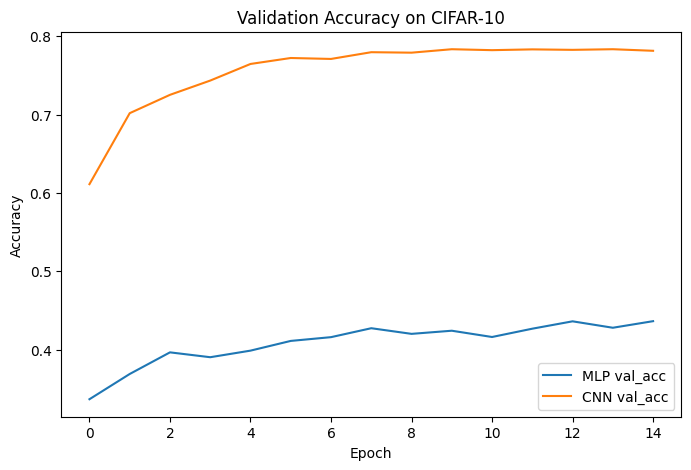

In [ ]:


plt.figure(figsize=(8,5))
plt.plot(history_mlp_cifar.history['val_accuracy'], label='MLP val_acc')
plt.plot(history_cnn_cifar.history['val_accuracy'], label='CNN val_acc')
plt.title('Validation Accuracy on CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
